In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [2]:
import folium
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import geojson as gj
import plotly.express as px
import json
import urllib.request
import requests
from urllib.request import urlopen

from IPython.display import display

plt.style.use('fivethirtyeight')
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['lines.color'] = 'r'

In [3]:
df=pd.read_csv('london_crime_by_lsoa.csv')

In [4]:
print("Display the top five rows of dataset")
print(df.head())

Display the top five rows of dataset
   lsoa_code     borough               major_category  \
0  E01001116     Croydon                     Burglary   
1  E01001646   Greenwich  Violence Against the Person   
2  E01000677     Bromley  Violence Against the Person   
3  E01003774   Redbridge                     Burglary   
4  E01004563  Wandsworth                      Robbery   

                minor_category  value  year  month  
0  Burglary in Other Buildings      0  2016     11  
1               Other violence      0  2016     11  
2               Other violence      0  2015      5  
3  Burglary in Other Buildings      0  2016      3  
4            Personal Property      0  2008      6  


In [5]:
print("To print the dimension of dataframe")
print(df.shape)

To print the dimension of dataframe
(13490604, 7)


In [6]:
print("To display column values ")
df1=df.head(10)
df1.columns.values


To display column values 


array(['lsoa_code', 'borough', 'major_category', 'minor_category',
       'value', 'year', 'month'], dtype=object)

In [7]:
print("To check if any colun has null values")
print(df.isnull().any())

To check if any colun has null values
lsoa_code         False
borough           False
major_category    False
minor_category    False
value             False
year              False
month             False
dtype: bool


In [8]:
df2=df[['borough','value']]

Years:  
[2008 2009 2010 2011 2012 2013 2014 2015 2016]
Sum of crimes happened in each year:
[715324 736121 737329 711624 724915 686407 680183 717214 738641]
Line graph denoting the total number crime in year 2012 to 2020


<ipython-input-9-7db497c746ce>:38: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


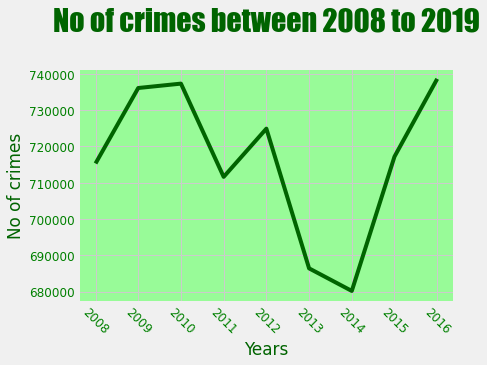

In [9]:
Year=df['year'].unique()
sumsandyear=df.groupby('year').sum()
sums=sumsandyear['value'].to_numpy()

n = len(Year)

for i in range(n):
    for j in range(0, n-i-1):
        if Year[j] > Year[j+1] :
                Year[j], Year[j+1] = Year[j+1], Year[j]
                sums[j], sums[j+1] = sums[j+1], sums[j]
 
print("Years:  ")
print(Year)
print("Sum of crimes happened in each year:")
print(sums)
print("Line graph denoting the total number crime in year 2012 to 2020")

pos1 = np.arange(len(Year))
font2 = {'family': 'Impact',
        'color':  'darkgreen',
        'weight': 'bold',
        'size': 30,
        }


plt.xticks(pos1,Year)
plt.plot(sums,color='darkgreen')
plt.xticks(pos1,Year)
plt.title("No of crimes between 2008 to 2019\n",fontdict=font2)
plt.xlabel('Years',color='darkgreen')
plt.ylabel("No of crimes",color='darkgreen')
plt.xticks(rotation=-45 )
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(color='green')
plt.yticks(color='green')
ax = plt.axes()
ax.set_facecolor("palegreen")

plt.show()


findfont: Font family ['Franklin Gothic Medium '] not found. Falling back to DejaVu Sans.


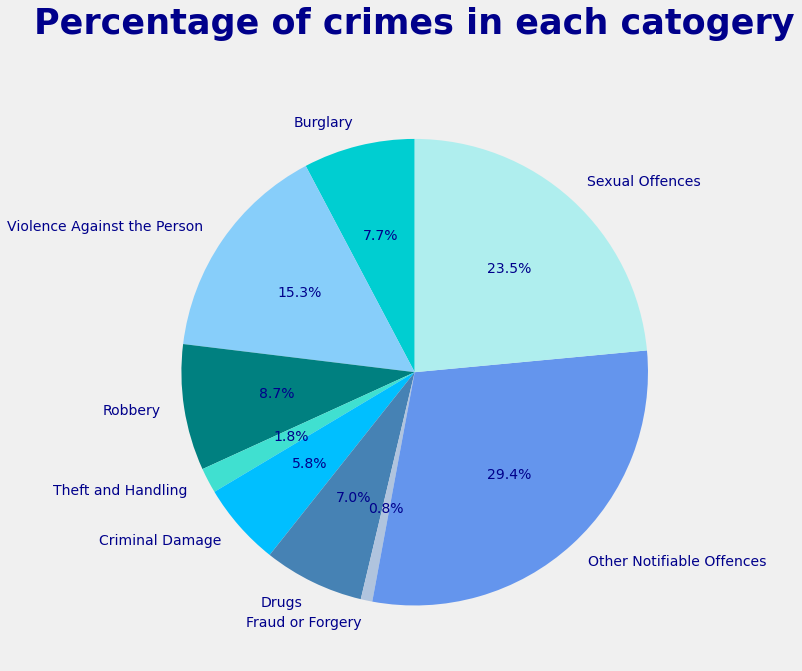

In [10]:

font1 = {'family': 'Franklin Gothic Medium ',
        'color':  'darkblue',
        'weight': 'bold',
        'size': 35,
        }

lables=df['major_category'].unique()

sizes=df.groupby(['major_category']).size()
colors=['darkturquoise','lightskyblue','teal','turquoise', 'deepskyblue','steelblue','lightsteelblue','cornflowerblue','paleturquoise']
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightblue")
plt.title('Percentage of crimes in each catogery\n',fontdict=font1)
ab=plt.pie(sizes, labels=lables, colors=colors, startangle=90,autopct='%1.1f%%', textprops={'fontsize': 14,'color':'darkblue'})
plt.show()


The type of crimes that are taking place 
['Burglary' 'Violence Against the Person' 'Robbery' 'Theft and Handling'
 'Criminal Damage' 'Drugs' 'Fraud or Forgery' 'Other Notifiable Offences'
 'Sexual Offences']
Total no of crime that took place in each catrgory: 
[ 754293  630938  470765    5325  106349  258873    1273 2661861 1558081]


<ipython-input-11-aa2698aa3b7d>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


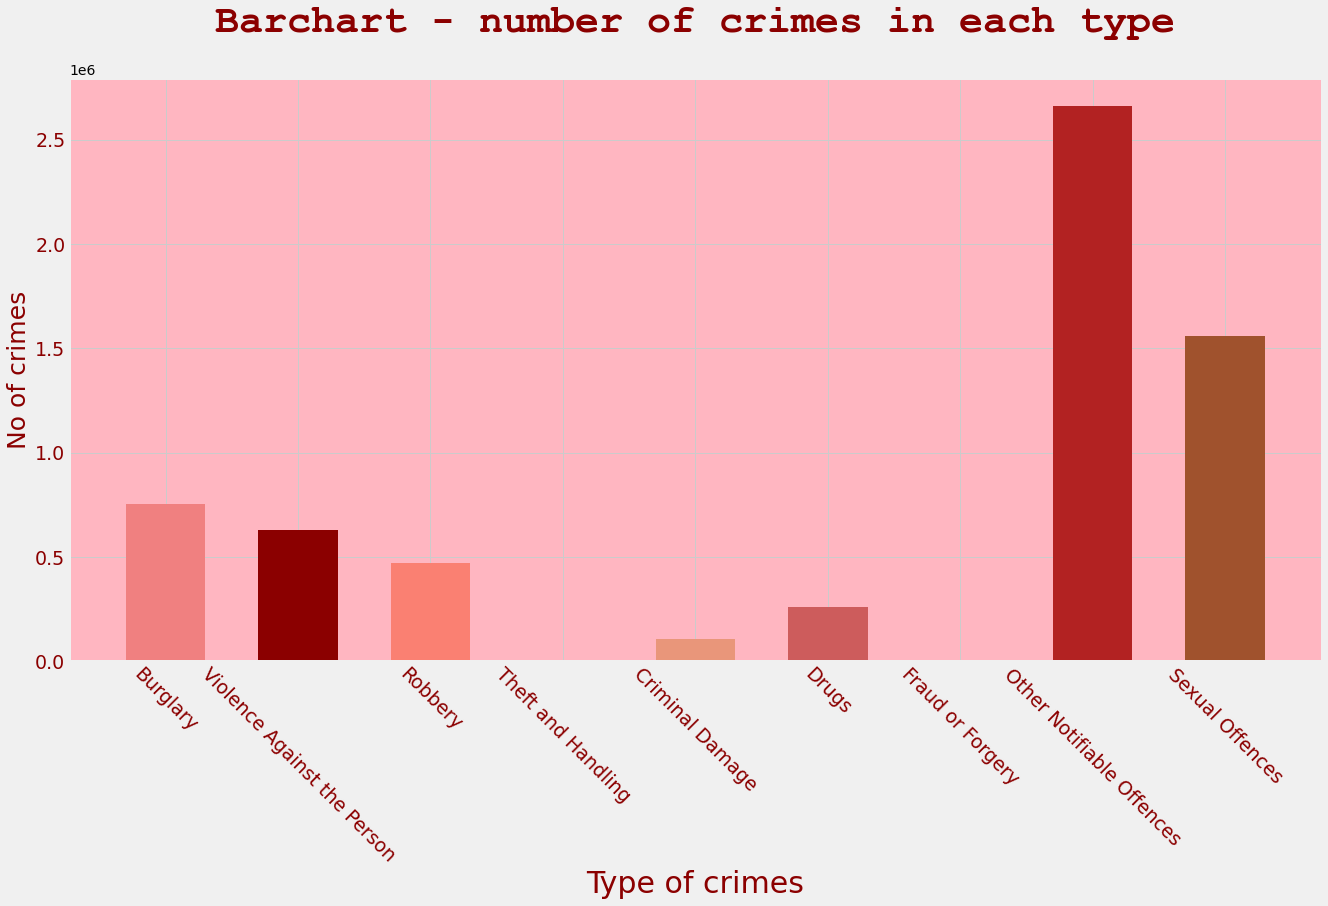

In [11]:
font = {'family': 'Courier New',
        'color':  'darkred',
        'weight': 'bold',
        'size': 40,
        }

label=df['major_category'].unique()
print("The type of crimes that are taking place ")
print(label)
pos = np.arange(len(label))
totals=df.groupby('major_category').sum()
Totals=totals['value'].to_numpy()
print("Total no of crime that took place in each catrgory: ")
print(Totals)
colors1=['lightcoral','darkred','salmon','coral','darksalmon','indianred','crimson','firebrick','sienna']
plt.figure(figsize=(20,10))
plt.bar(pos,Totals,color=colors1,width=0.6)
ax = plt.axes()
ax.set_facecolor("lightpink")
plt.margins(0.05)
plt.xticks(pos, label)
plt.xlabel('Type of crimes', fontsize=30,color='darkred')
plt.xticks(rotation=-45)
plt.xticks(fontsize=19,color='darkred')
plt.yticks(fontsize=19,color='darkred')
plt.ylabel('No of crimes', fontsize=25,color='darkred')
plt.title('Barchart - number of crimes in each type\n',fontdict=font)
plt.show()

no of crime in each month in the year 2016
['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
[58847 56697 59167 58637 63990 62262 65519 62666 61412 63405 61064 62455]


(array([56000., 58000., 60000., 62000., 64000., 66000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

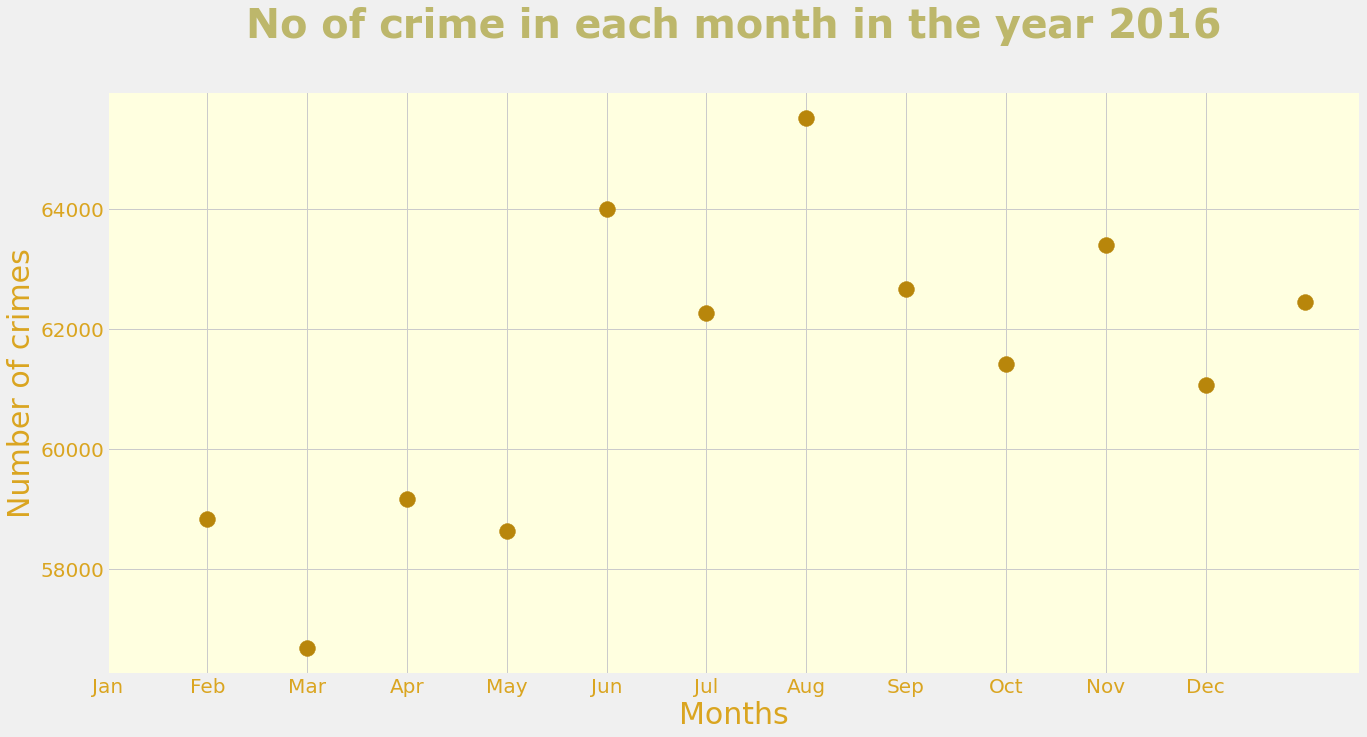

In [12]:


font = {'family': 'Verdana',
        'color':  'darkkhaki',
        'weight': 'bold',
        'size': 40,
        }
year2016=df.loc[df['year'] == 2016]

months=year2016['month'].unique()

months.sort()

sum_month=year2016.groupby(['month']).sum()

Values=sum_month['value'].to_numpy()
name_of_months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
print("no of crime in each month in the year 2016")
print(name_of_months)
print(Values)
n1 = np.arange(len(months))
xrange=range(1,13)
    
plt.figure(figsize=(20,10))
ax = plt.axes()
ax.set_facecolor("lightyellow")
plt.scatter(xrange,Values,s=250,color='darkgoldenrod',cmap='viridis',alpha=1)
plt.title("No of crime in each month in the year 2016\n",fontdict=font)
plt.xlabel('Months',fontsize=30,color='goldenrod')
plt.ylabel('Number of crimes',fontsize=30,color='goldenrod')
plt.xticks(n1,name_of_months)
plt.xticks(color='goldenrod',fontsize=20)
plt.yticks(color='goldenrod',fontsize=20)


In [21]:

#url ='https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json'
#urllib.request.urlretrieve(url, 'world_countries.json')
#with urlopen('https://github.com/python-visualization/folium/blob/master/examples/data/world-countries.json') as response:
#    world_geo = json.load(response)
print("Crime rate in boroughs of london")
print("please zoom in to view the map")
df2=df[['borough','value']]
world_geo = r'https://raw.githubusercontent.com/radoi90/housequest-data/master/london_boroughs.geojson' 
world_map=folium.Map(location=[34,-117],zoom_start=6)#[纬度lat,经度lng]

world_map.choropleth(
    geo_data=world_geo,
    name='choropleth',
    data=df2,
    columns=['borough', 'value'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Crime rate in boroughs of london'
    
)

#folium.LayerControl().add_to(world_map)
world_map.save('LondonCrime.html')
display(world_map)



Crime rate in boroughs of london
please zoom in to view the map


Ploting pairwise of columns


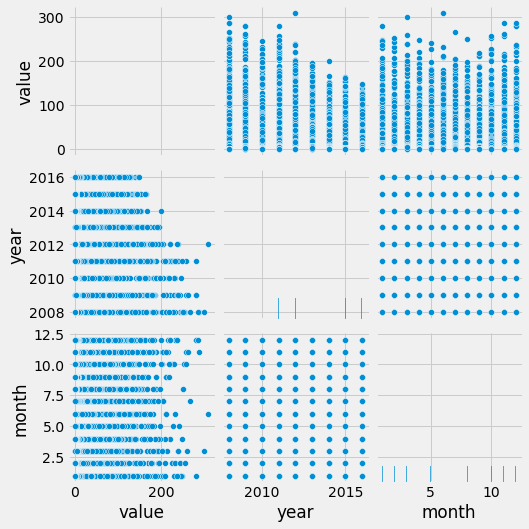

In [14]:
print("Ploting pairwise of columns")
sns.pairplot(df)